

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)




<IPython.core.display.Javascript object>


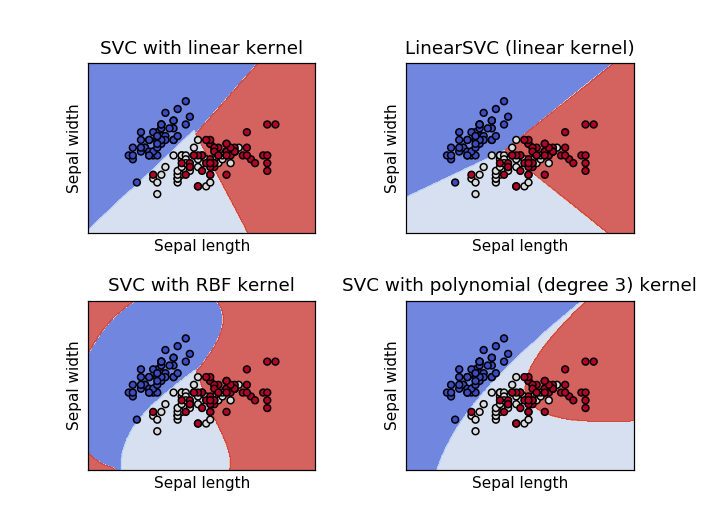

/home/tree/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/tree/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [20]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib notebook


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook


%matplotlib notebook
iris = datasets.load_iris()
# X = iris.data[:, :2]
# y = iris.target




# Controlled dataset
X, y = datasets.make_blobs(n_samples=100,\
                           n_features=2,\
                           centers=2,\
                           cluster_std=2,\
                           center_box=(-18, 18),\
                           random_state=1234)






def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 10, x.max() + 10
    y_min, y_max = y.min() - 10, y.max() + 10
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy




def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



<IPython.core.display.Javascript object>


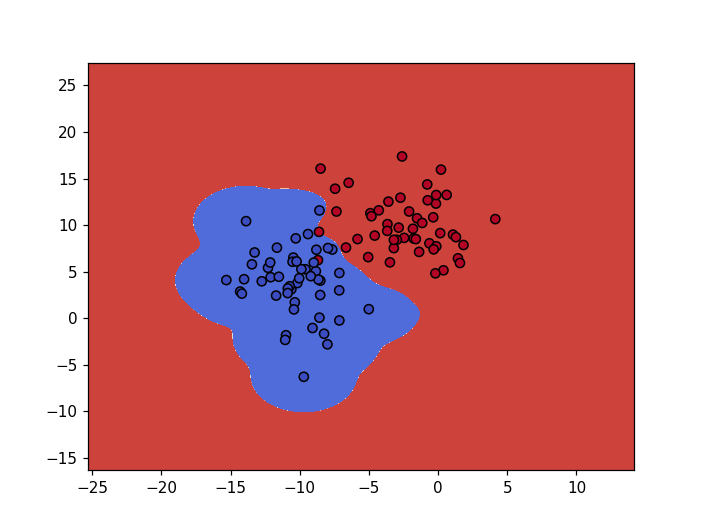

interactive(children=(Dropdown(description='centers', index=1, options=(1, 2, 3, 4, 5, 6), value=2), Dropdown(…

<function __main__.update(centers=2, cluster_std=2, C=1, degree=3, kernel='poly', gamma=0.5)>

In [66]:
# Model
svm_model = svm.SVC(kernel='poly', degree=3, C=1)
svm_model.fit(X, y)

# Meshgrid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Figure
fig, ax = plt.subplots(1, 1)
contours = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
points = ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
# ax.set_xlim(xx.min(), xx.max())
# ax.set_ylim(yy.min(), yy.max())


def update(centers=2, cluster_std=2, C=1, degree=3, kernel='poly', gamma=0.5):
    
    
    # Controlled dataset
    X, y = datasets.make_blobs(n_samples=100,\
                               n_features=2,\
                               centers=centers,\
                               cluster_std=cluster_std,\
                               center_box=(-18, 18),\
                               random_state=1234)
    # Meshgrid
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
    # Fit
    if kernel == 'poly':
        svm_model = svm.SVC(kernel=kernel, degree=degree, C=C)
        svm_model.fit(X, y)
        print(f'{svm_model.kernel}')
        print(f'svm {svm_model.kernel} degree: {svm_model.degree}')
        print(f'svm {svm_model.kernel} C: {svm_model.C}')
    if kernel == 'linear':
        svm_model = svm.SVC(kernel=kernel, C=C)
        svm_model.fit(X, y)
        print(svm_model.kernel)
        print(f'svm {svm_model.kernel} C: {svm_model.C}')
    if kernel == 'rbf':
        svm_model = svm.SVC(kernel=kernel, C=C, gamma=gamma)
        svm_model.fit(X, y)
        print(svm_model.kernel)
        print(f'svm {svm_model.kernel} C: {svm_model.C}')
        print(f'svm {svm_model.kernel} gamma: {svm_model.gamma}')
    
    
    
    
    # Predict
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    contours.ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
#     points.ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    points.axes.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    print('Finished training and predicting')
    
    
    

interact(update,\
         centers=[1,2,3,4,5,6],\
         cluster_std=[1,2,3,4,5,6,7,8,9,10],\
         kernel=['poly', 'linear', 'rbf'],\
         C=widgets.FloatSlider(min=1, max=10, step=1, value=3),\
        degree=widgets.IntSlider(min=1, max=10, step=1, value=3),\
        gamma=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.03))